In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data

In [2]:
!pip3 install pandas_datareader

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data

In [4]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [7]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


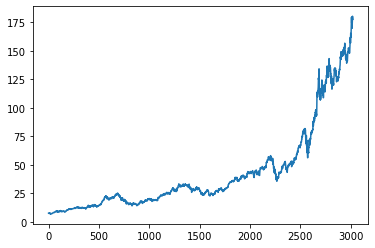

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3017,180.419998,177.070007,177.089996,180.330002,74919600.0
3018,181.330002,178.529999,180.160004,179.289993,79144300.0
3019,180.630005,178.139999,179.330002,179.380005,62348900.0
3020,180.570007,178.089996,179.470001,178.199997,59773000.0


In [10]:
ma100 = df.Close.rolling(100).mean()                      ##moving avg
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

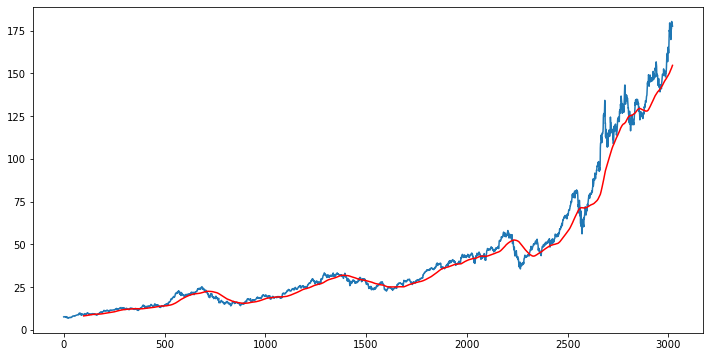

In [11]:
#plot the moving avg
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()                      ##moving avg
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

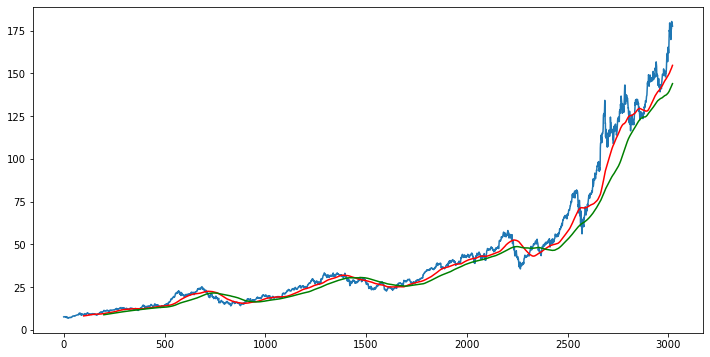

In [13]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [14]:
df.shape

(3022, 5)

In [15]:
#split in training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2115, 1)
(907, 1)


In [16]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [18]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [20]:
data_training_array.shape

(2115, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#ML Model

In [26]:
x_train.shape

(2015, 100, 1)

In [27]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install keras.api

ERROR: Could not find a version that satisfies the requirement keras.api (from versions: none)
ERROR: No matching distribution found for keras.api


In [25]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units =50, activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units =60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units =80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units =120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
63/63 [==============================] - 15s 188ms/step - loss: 0.0395
Epoch 2/50
63/63 [==============================] - 12s 194ms/step - loss: 0.0080
Epoch 3/50
63/63 [==============================] - 13s 214ms/step - loss: 0.0070
Epoch 4/50
63/63 [==============================] - 12s 197ms/step - loss: 0.0081
Epoch 5/50
63/63 [==============================] - 15s 237ms/step - loss: 0.0054
Epoch 6/50
63/63 [==============================] - 13s 211ms/step - loss: 0.0061
Epoch 7/50
63/63 [==============================] - 13s 210ms/step - loss: 0.0053
Epoch 8/50
63/63 [==============================] - 14s 217ms/step - loss: 0.0057
Epoch 9/50
63/63 [==============================] - 15s 235ms/step - loss: 0.0046
Epoch 10/50
63/63 [==============================] - 13s 214ms/step - loss: 0.0051
Epoch 11/50
63/63 [==============================] - 13s 211ms/step - loss: 0.0041
Epoch 12/50
63/63 [==============================] - 14s 214ms/step - loss: 0.0050
Epoch 13/50
6

In [34]:
model.save('keras_model.h5')

In [35]:
data_testing.head()

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500


In [36]:
data_training.tail(100)

,Close
2015,43.057499
2016,43.257500
2017,43.750000
2018,43.587502
2019,43.582500
...,...
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [37]:
past_100_days = data_training.tail(100)

In [38]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [39]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [40]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [41]:
input_data.shape

(1007, 1)

In [42]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [43]:
x_test , y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [44]:
#making prediction

y_predicted = model.predict(x_test)

In [45]:
y_predicted.shape

(907, 1)

In [46]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [47]:
y_predicted

array([[0.14139281],
       [0.14218895],
       [0.14289941],
       [0.14352182],
       [0.14407241],
       [0.14458272],
       [0.14508718],
       [0.14561543],
       [0.14618182],
       [0.14677835],
       [0.14738515],
       [0.14798748],
       [0.14856613],
       [0.14910273],
       [0.14957486],
       [0.14996353],
       [0.15024404],
       [0.15040258],
       [0.15043458],
       [0.15034162],
       [0.15012121],
       [0.14978744],
       [0.1493644 ],
       [0.14888452],
       [0.14837864],
       [0.14788216],
       [0.14740893],
       [0.14696716],
       [0.146579  ],
       [0.14627752],
       [0.14608607],
       [0.14599895],
       [0.14601377],
       [0.14613052],
       [0.14633888],
       [0.1466256 ],
       [0.14696987],
       [0.14735615],
       [0.14777058],
       [0.14819925],
       [0.14863798],
       [0.1490955 ],
       [0.14957646],
       [0.15005985],
       [0.15051353],
       [0.15091357],
       [0.15131235],
       [0.151

In [48]:
scaler.scale_

array([0.00690691])

In [49]:
scale_factor=1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

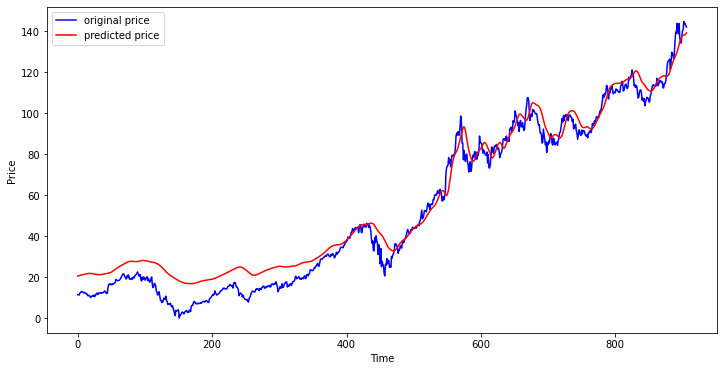

In [50]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'original price')
plt.plot(y_predicted,'r',label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()